m

In [11]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

#Defining a function to read file and take the transpose
def read_files(file1, file2):
    
    """ Reads csv file, converts the csv file to pandas dataframe,
    takes transpose of that dataframe and finally prints the headers 
    of the given data
    """
    
    file1 = pd.read_csv(f"{file1}.csv", sep="\t", on_bad_lines='skip')
    file1 = file1.drop(['Country Code', 'Indicator Code'], axis=1)
    file2 = file1.transpose()
    print("Original Data Frame header")
    print(file1.head)
    print(file1.columns)
    
    return file1, file2

#Giving the parameters to the function
df_countries, df_countries_tr = read_files("API_19_DS2_en_csv_v2_5552390",
                                   "API_19_DS2_en_csv_v2_5552390")

Original Data Frame header
<bound method NDFrame.head of       Country Name                                     Indicator Name  \
0            Aruba           Urban population (% of total population)   
1            Aruba                                   Urban population   
2            Aruba                 Urban population growth (annual %)   
3            Aruba                                  Population, total   
4            Aruba                       Population growth (annual %)   
...            ...                                                ...   
20211     Zimbabwe  Rural land area where elevation is below 5 met...   
20212     Zimbabwe  Rural land area where elevation is below 5 met...   
20213     Zimbabwe                       Arable land (% of land area)   
20214     Zimbabwe                 Agricultural land (% of land area)   
20215     Zimbabwe                         Agricultural land (sq. km)   

            1960           1961           1962           1963     

In [12]:
#getting uae n20 emission data
df_uae = df_countries[df_countries["Country Name"] == "United Arab Emirates"]
df_n2o = df_uae[df_uae['Indicator Name']=="Nitrous oxide emissions (thousand metric tons of CO2 equivalent)"].transpose()
df_n2o = df_n2o.drop(["Country Name", "Indicator Name"])

# drop nan values
df_n2o=df_n2o.dropna().transpose()

#Creating dataframes for analysis
UAE = pd.DataFrame()
UAE["N2O emissions"] = df_n2o.iloc[0]
UAE["N2O emissions"] = pd.to_numeric(UAE["N2O emissions"])

df_methane = df_uae[df_uae['Indicator Name']=="Methane emissions (kt of CO2 equivalent)"].transpose()
df_methane = df_methane.drop(["Country Name", "Indicator Name"])

# drop nan values
df_methane=df_methane.dropna().transpose()

#adding column to UAE dataframe
UAE["Methane emissions"] = df_methane.iloc[0]
UAE["Methane emissions"] = pd.to_numeric(UAE["Methane emissions"])

df_co2 = df_uae[df_uae['Indicator Name']=="CO2 emissions (kt)"].transpose()
df_co2 = df_co2.drop(["Country Name", "Indicator Name"])

# drop nan values
df_co2 = df_co2.dropna().transpose()

#adding column to UAE dataframe
UAE["CO2 emissions"] = df_co2.iloc[0]
UAE["CO2 emissions"] = pd.to_numeric(UAE["CO2 emissions"])

df_greenhouse = df_uae[df_uae["Indicator Name"] == "Total greenhouse gas emissions (kt of CO2 equivalent)"]
df_greenhouse = df_greenhouse.drop(["Country Name", "Indicator Name"], axis = 1)
df_greenhouse = df_greenhouse.transpose()

# drop nan values
df_greenhouse = df_greenhouse.dropna().transpose()

#adding column to UAE dataframe
UAE["Total greenhouse gas emissions"] = df_greenhouse.iloc[0]
UAE["Total greenhouse gas emissions"] = pd.to_numeric(UAE["Total greenhouse gas emissions"])

df_arabel = df_uae[df_uae["Indicator Name"] == "Arable land (% of land area)"]
df_arabel = df_arabel*100
df_arabel = df_arabel.drop(["Country Name", "Indicator Name"], axis = 1)
df_arabel = df_arabel.transpose()

# drop nan values
df_arabel = df_arabel.dropna().transpose()

#adding column to dataframe
UAE["Arable land"] = df_arabel.iloc[0]
UAE["Arable land"] = pd.to_numeric(UAE["Arable land"])


#Reseting the index column from years 
UAE = UAE.reset_index(level=0)
UAE = UAE.rename(columns = {"index":"Year"})

#Converting Year column to datetime object
UAE["Year"] = pd.to_datetime(UAE["Year"])

In [14]:
#Applying statistical tools to the data frame
print("Covariance")
display(UAE.cov())
print("Correlation")
correlation_M = UAE.corr()
display(correlation_M)

Covariance


,N2O emissions,Methane emissions,CO2 emissions,Total greenhouse gas emissions,Arable land
N2O emissions,2.297194e+05,5.100592e+06,2.339799e+07,2.899714e+07,313.618420
Methane emissions,5.100592e+06,1.164113e+08,5.245307e+08,6.522293e+08,-6982.800010
CO2 emissions,2.339799e+07,5.245307e+08,2.447072e+09,3.022351e+09,-21755.690014
Total greenhouse gas emissions,2.899714e+07,6.522293e+08,3.022351e+09,3.737732e+09,-28894.208715
Arable land,3.136184e+02,-6.982800e+03,-2.175569e+04,-2.889421e+04,232.371308


Correlation


,N2O emissions,Methane emissions,CO2 emissions,Total greenhouse gas emissions,Arable land
N2O emissions,1.000000,0.986334,0.986862,0.989583,0.042925
Methane emissions,0.986334,1.000000,0.982766,0.988778,-0.042456
CO2 emissions,0.986862,0.982766,1.000000,0.999350,-0.028851
Total greenhouse gas emissions,0.989583,0.988778,0.999350,1.000000,-0.031004
Arable land,0.042925,-0.042456,-0.028851,-0.031004,1.000000


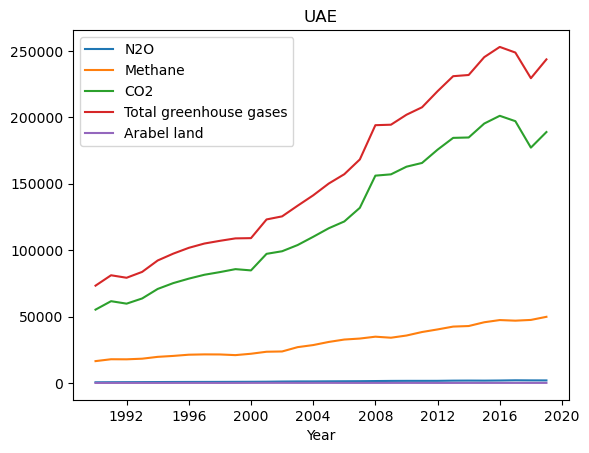

In [15]:
#Line plot
plt.figure()
plt.plot(UAE["Year"], UAE["N2O emissions"], 
          label = "N2O")
plt.plot(UAE["Year"], UAE["Methane emissions"], 
          label = "Methane")
plt.plot(UAE["Year"], UAE["CO2 emissions"], 
          label = "CO2")
plt.plot(UAE["Year"], UAE["Total greenhouse gas emissions"], 
         label = "Total greenhouse gases")
plt.plot(UAE["Year"], UAE["Arable land"], 
         label = "Arabel land")
plt.xlabel("Year")
plt.title("UAE")
plt.legend()
plt.savefig("UAE")
plt.show()

m

In [16]:
#getting usa urban population data
df_usa = df_countries[df_countries["Country Name"] == "United States"]
df_urban = df_usa[df_usa['Indicator Name']=="Urban population (% of total population)"].transpose()
df_urban = df_urban.drop(["Country Name", "Indicator Name"])

# drop nan values
df_urban = df_urban.dropna().transpose()

#Creating dataframes for analysis
USA = pd.DataFrame()
USA["Urban Population"] = df_urban.iloc[0]
USA["Urban Population"] = pd.to_numeric(USA["Urban Population"])

#getting usa agricultural data
df_agricultural = df_usa[df_usa["Indicator Name"] == "Agricultural land (% of land area)"].transpose()
df_agricultural = df_agricultural.drop(["Country Name", "Indicator Name"])

# drop nan values
df_agricultural = df_agricultural.dropna()
df_agricultural = df_agricultural.transpose()


#Creating dataframes for analysis
USA["Agricultural land"] = df_agricultural.iloc[0]
USA["Agricultural land"] = pd.to_numeric(USA["Agricultural land"])
USA = USA.dropna()

#getting usa arabel land data
Arable = df_usa[df_usa["Indicator Name"] == "Arable land (% of land area)"].transpose()
Arable = Arable.drop(["Country Name", "Indicator Name"])

# drop nan values
Arable = Arable.dropna().transpose()

#Creating dataframes for analysis
USA["Arable land"] = Arable.iloc[0]
USA["Arable land"] = pd.to_numeric(USA["Arable land"])
USA = USA.dropna()

#Reseting the index column from years 
USA = USA.reset_index(level=0)
USA = USA.rename(columns = {"index":"Year"})

#Convert year to datetime object
USA["Year"] = pd.to_datetime(USA["Year"])

Covariance


,Urban Population,Agricultural land,Arable land
Urban Population,12.823138,-4.553514,-3.870273
Agricultural land,-4.553514,1.666092,1.357322
Arable land,-3.870273,1.357322,1.669423


Correlation


,Urban Population,Agricultural land,Arable land
Urban Population,1.000000,-0.985145,-0.836491
Agricultural land,-0.985145,1.000000,0.813861
Arable land,-0.836491,0.813861,1.000000


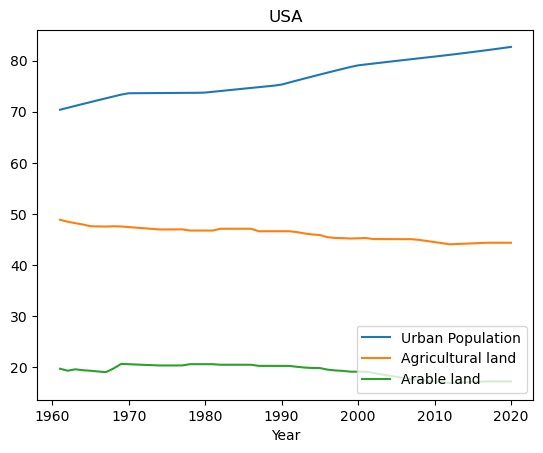

In [17]:
#Applying statistical tools to the data frame
print("Covariance")
display(USA.cov())
print("Correlation")
corr_usa = USA.corr()
display(corr_usa)

#Line plot
plt.figure()
plt.plot(USA["Year"], USA["Urban Population"], 
            label = "Urban Population")
plt.plot(USA["Year"], USA["Agricultural land"], 
            label = "Agricultural land")
plt.plot(USA["Year"], USA["Arable land"], 
            label = "Arable land")
plt.xlabel("Year")
plt.title("USA")
plt.legend(loc="lower right")
plt.savefig("USA")
plt.show()

In [18]:
#getting australia data for co2 indicator
df_co2 = df_countries[df_countries["Indicator Name"] == "CO2 emissions (kt)"]
df_aus = df_co2[df_co2["Country Name"] == "Australia"].transpose()
df_aus = df_aus.drop(["Country Name", "Indicator Name"])

# drop nan values
df_aus = df_aus.dropna()
df_aus = df_aus.transpose()


#Creating dataframes for analysis
CO2 = pd.DataFrame()
CO2["Australia"] = df_aus.iloc[0]

#getting bangladesh data for co2 indicator
df_bgd = df_co2[df_co2["Country Name"] == "Bangladesh"].transpose()
df_bgd = df_bgd.drop(["Country Name", "Indicator Name"])

# drop nan values
df_bgd = df_bgd.dropna()
df_bgd = df_bgd.transpose()


#Creating dataframes for analysis
CO2["Bangladesh"] = df_bgd.iloc[0]

#getting pakistan data for co2 indicator
df_pak = df_co2[df_co2["Country Name"] == "Pakistan"].transpose()
df_pak = df_pak.drop(["Country Name", "Indicator Name"])

# drop nan values
df_pak = df_pak.dropna()
df_pak = df_pak.transpose()


#Creating dataframes for analysis
CO2["Pakistan"] = df_pak.iloc[0]

#getting canada data for co2 indicator
df_cda = df_co2[df_co2["Country Name"] == "Canada"].transpose()
df_cda = df_cda.drop(["Country Name", "Indicator Name"])

# drop nan values
df_cda = df_cda.dropna()
df_cda = df_cda.transpose()

#Creating dataframes for analysis
CO2["Canada"] = df_cda.iloc[0]

#Reseting the index column
CO2 = CO2.reset_index(level=0)
CO2 = CO2.rename(columns = {"index":"Year"})

#Converting Year column to datetime object
CO2["Year"] = pd.to_datetime(CO2["Year"])

In [19]:
# Applying statistical tools
print("Average CO2 emitted by Bangladesh")
print(np.mean(CO2["Bangladesh"]))
print("Average CO2 emitted by Australia")
print(np.mean(CO2["Australia"]))
print("Average CO2 emitted by Pakistan")
print(np.mean(CO2["Pakistan"]))
print("Average CO2 emitted by Canada")
print(np.mean(CO2["Canada"]))
print("Standard Deviation")
print(CO2.std())

Average CO2 emitted by Bangladesh
38882.65666666666
Average CO2 emitted by Australia
347397.1533333332
Average CO2 emitted by Pakistan
121471.49333333335
Average CO2 emitted by Canada
514549.19000000006
Standard Deviation
Year          3215 days 10:49:52.867838656
Australia                     44911.699815
Bangladesh                    24286.380219
Pakistan                      40258.720663
Canada                         52991.74602
dtype: object


<Figure size 640x480 with 0 Axes>

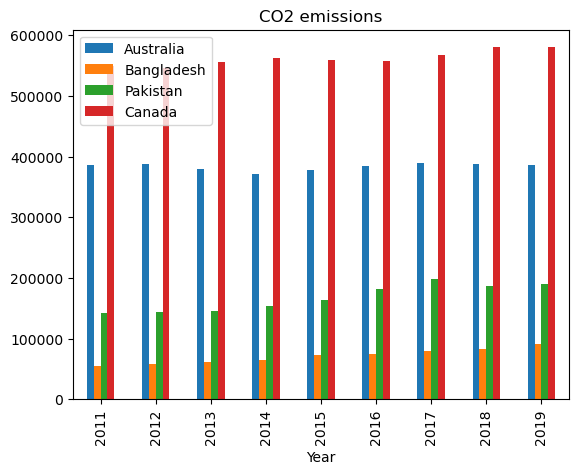

In [20]:
#Bargraph
df = pd.DataFrame(CO2)
df = df[(df["Year"] > "2010-01-01 00:00:00") & 
        (df["Year"] <= "2019-01-01 00:00:00")]
plt.figure()
df.plot.bar("Year", ["Australia", "Bangladesh", "Pakistan",
                     "Canada"], width = 0.5)

plt.xticks([0,1,2,3,4,5,6,7,8], 
        labels = ["2011", "2012", "2013", "2014", "2015", "2016",
            "2017", "2018", "2019"])
plt.title("CO2 emissions")
plt.savefig("CO2 emissions")
plt.show()

In [21]:
#getting australia data for arable land indicator
df_arable_l = df_countries[df_countries["Indicator Name"] == "Arable land (% of land area)"]
AUS = df_arable_l[df_arable_l["Country Name"] == "Australia"].transpose()
AUS = AUS.drop(["Country Name", "Indicator Name"])

# drop nan values
AUS = AUS.dropna()
AUS = AUS.transpose()

#Creating dataframes for analysis
Arable1 = pd.DataFrame()
Arable1["Australia"] = AUS.iloc[0]

#getting bangladesh data for arable land indicator
BGD = df_arable_l[df_arable_l["Country Name"] == "Bangladesh"].transpose()
BGD = BGD.drop(["Country Name", "Indicator Name"])

# drop nan values
BGD = BGD.dropna()
BGD = BGD.transpose()

#Creating dataframes for analysis
Arable1["Bangladesh"] = BGD.iloc[0]

#getting pakistan data for arable land indicator
PAK = df_arable_l[df_arable_l["Country Name"] == "Pakistan"].transpose()
PAK = PAK.drop(["Country Name", "Indicator Name"])

# drop nan values
PAK = PAK.dropna()
PAK = PAK.transpose()


#Creating dataframes for analysis
Arable1["Pakistan"] = PAK.iloc[0]

#getting canada data for arable land indicator
CDA = df_arable_l[df_arable_l["Country Name"] == "Canada"].transpose()
CDA = CDA.drop(["Country Name", "Indicator Name"])

# drop nan values
CDA = CDA.dropna()
CDA = CDA.transpose()

#Creating dataframes for analysis
Arable1["Canada"] = CDA.iloc[0]

#Reseting the index column
Arable1 = Arable1.reset_index(level=0)
Arable1 = Arable1.rename(columns = {"index":"Year"})

#Converting Year column to datetime object
Arable1["Year"] = pd.to_datetime(Arable1["Year"])

In [22]:
#Applying statistical tools
print("Average Arable land in Bangladesh")
print(np.mean(Arable1["Bangladesh"]))
print("Average Arable land in Australia")
print(np.mean(Arable1["Australia"]))
print("Average Arable land in Pakistan")
print(np.mean(Arable1["Pakistan"]))
print("Average Arable land in Canada")
print(np.mean(Arable1["Canada"]))
print("Standard Deviation")
print(Arable1.std())

Average Arable land in Bangladesh
65.79115515666668
Average Arable land in Australia
2.77294002155
Average Arable land in Pakistan
39.939203680000006
Average Arable land in Canada
4.405050141533334
Standard Deviation
Year          6378 days 19:10:18.762437888
Australia                         0.709596
Bangladesh                        4.414543
Pakistan                          0.976407
Canada                            0.161945
dtype: object


<Figure size 640x480 with 0 Axes>

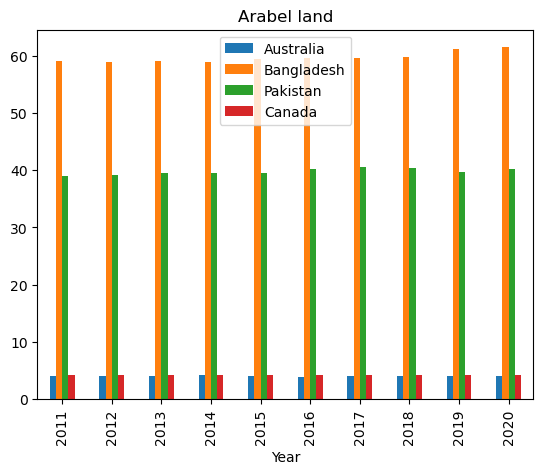

In [23]:
#Bargraph
df1 = pd.DataFrame(Arable1)
df1 = df1[(df1["Year"] > "2010-01-01 00:00:00") & 
        (df1["Year"] <= "2020-01-01 00:00:00")]

plt.figure()
df1.plot.bar("Year", ["Australia", "Bangladesh", "Pakistan",
                     "Canada"], width = 0.5)

plt.xticks([0,1,2,3,4,5,6,7,8,9], 
        labels = ["2011", "2012", "2013", "2014", "2015", "2016",
            "2017", "2018", "2019", "2020"])
plt.title("Arabel land")
plt.savefig("Arabel land")
plt.show()